In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt

In [3]:
waves = np.arange(0.8, 1.1, 0.005)

In [4]:
waves.shape

(61,)

In [5]:
wavenos = 1e4/waves

In [6]:
wavenos

array([ 12500.        ,  12422.36024845,  12345.67901235,  12269.93865031,
        12195.12195122,  12121.21212121,  12048.19277108,  11976.04790419,
        11904.76190476,  11834.31952663,  11764.70588235,  11695.90643275,
        11627.90697674,  11560.69364162,  11494.25287356,  11428.57142857,
        11363.63636364,  11299.43502825,  11235.95505618,  11173.18435754,
        11111.11111111,  11049.72375691,  10989.01098901,  10928.96174863,
        10869.56521739,  10810.81081081,  10752.68817204,  10695.18716578,
        10638.29787234,  10582.01058201,  10526.31578947,  10471.20418848,
        10416.66666667,  10362.69430052,  10309.27835052,  10256.41025641,
        10204.08163265,  10152.28426396,  10101.01010101,  10050.25125628,
        10000.        ,   9950.24875622,   9900.99009901,   9852.21674877,
         9803.92156863,   9756.09756098,   9708.73786408,   9661.83574879,
         9615.38461538,   9569.37799043,   9523.80952381,   9478.67298578,
         9433.96226415,  

In [7]:
import hapi

HAPI VERSION: 1.0


In [8]:
hapi.db_begin('hapi_db')

Using hapi_db

CO2
                     Lines parsed: 4066


In [9]:
nu_min = 1e7/1150
nu_max = 1e7/800
hapi.fetch('CO2', 2, 1, nu_min, nu_max)

BEGIN DOWNLOAD: CO2
  65536 bytes written to hapi_db/CO2.data
  65536 bytes written to hapi_db/CO2.data
  65536 bytes written to hapi_db/CO2.data
  65536 bytes written to hapi_db/CO2.data
  65536 bytes written to hapi_db/CO2.data
  65536 bytes written to hapi_db/CO2.data
  65536 bytes written to hapi_db/CO2.data
  65536 bytes written to hapi_db/CO2.data
  65536 bytes written to hapi_db/CO2.data
  65536 bytes written to hapi_db/CO2.data
  65536 bytes written to hapi_db/CO2.data
Header written to hapi_db/CO2.header
END DOWNLOAD
                     Lines parsed: 4066
PROCESSED


In [10]:
# %%timeit 
# nu, coeff_co2 = hapi.absorptionCoefficient_Voigt(SourceTables='CO2',
#                                                  Environment={'p': 90, 
#                                                               'T': 700},
#                                                  GammaL='gamma_self')

In [11]:
# %%timeit
# nu, coeff_co2 = hapi.absorptionCoefficient_Voigt(SourceTables='CO2',
#                                                  Environment={'p': 90,
#                                                               'T': 700},
#                                                  OmegaStep=0.1,
#                                                  GammaL='gamma_self')

In [12]:
# %%timeit
# nu, coeff_co2 = hapi.absorptionCoefficient_Voigt(SourceTables='CO2',
#                                                  Environment={'p': 90,
#                                                               'T': 700},
#                                                  OmegaGrid=wavenos,
#                                                  GammaL='gamma_self')

# Warning!
The %timeit (for 1-liners) and %%timeit (for several lines of code) ipython magics (that's what they call %-functions) don't actually store the results for memory protection reasons (imagine each of your tests create a lot of data), so you have to run it without the timing test to actually get to the result.

Also, even so the wavenumber min delta required would have been around 40, anything larger than 0.1 wavenumbers and the code barks that that would lead to declining accuracy.

## Using OmegaGrid
Interestingly, using OmegaGrid, it does not bark, even so the deltas are between 40 and 70 wavenumbers.

In [13]:
nu, coeff_co2 = hapi.absorptionCoefficient_Voigt(SourceTables='CO2',
                                                 Environment={'p': 90,
                                                              'T': 700},
                                                 OmegaGrid=wavenos,
#                                                  OmegaRange=[wavenos.min(),
#                                                              wavenos.max()],
#                                                  OmegaStep=0.1,
                                                 GammaL='gamma_self')

In [14]:
print(wavenos[::-1])

[  9090.90909091   9132.42009132   9174.31192661   9216.58986175
   9259.25925926   9302.3255814    9345.79439252   9389.6713615
   9433.96226415   9478.67298578   9523.80952381   9569.37799043
   9615.38461538   9661.83574879   9708.73786408   9756.09756098
   9803.92156863   9852.21674877   9900.99009901   9950.24875622  10000.
  10050.25125628  10101.01010101  10152.28426396  10204.08163265
  10256.41025641  10309.27835052  10362.69430052  10416.66666667
  10471.20418848  10526.31578947  10582.01058201  10638.29787234
  10695.18716578  10752.68817204  10810.81081081  10869.56521739
  10928.96174863  10989.01098901  11049.72375691  11111.11111111
  11173.18435754  11235.95505618  11299.43502825  11363.63636364
  11428.57142857  11494.25287356  11560.69364162  11627.90697674
  11695.90643275  11764.70588235  11834.31952663  11904.76190476
  11976.04790419  12048.19277108  12121.21212121  12195.12195122
  12269.93865031  12345.67901235  12422.36024845  12500.        ]


In [15]:
waves_nu = 1e4/nu

### wavelengths vs wavenumbers issue
I understand it now. When one calculates the wavenumbers from wavelengths and does *NOT* invert them in sequence and provides it to the coeff calculator, the confusing part is that it returns things in increasing wavenumber order.

This means, if I plot the result over un-inverted wavelengths, it's wrong! One has to invert the wavelengths, now that the results are sorted by increasing wavenumber. This is no Python-ism but a decision of the HAPI API, probably based on old calculation formulas that were used to start at the lowest wavenumber. See below how to get it correct and consistent.

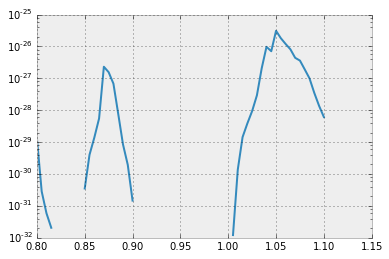

In [16]:
plt.semilogy(waves[::-1], coeff_co2)

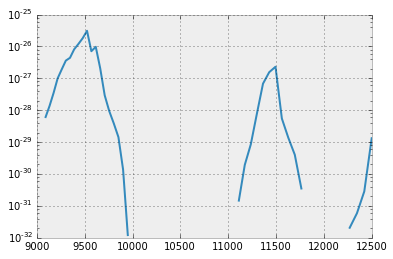

In [17]:
plt.semilogy(nu, coeff_co2)

This strongly looks like 0.005 micron is not enough resolution, the plots looks a lot different then before. I go to 0.001 micron resolution for the following plots:

In [18]:
waves = np.arange(0.8, 1.1, 0.001)

In [19]:
wavenos = 1e4/waves

In [20]:
nu, coeff_co2 = hapi.absorptionCoefficient_Voigt(SourceTables='CO2',
                                                 Environment={'p': 90,
                                                              'T': 700},
                                                 OmegaGrid=wavenos,
                                                 GammaL='gamma_self')

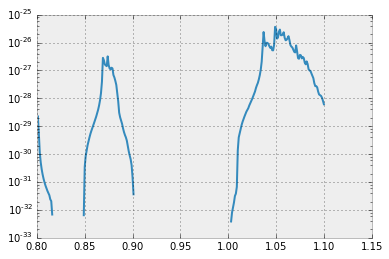

In [21]:
plt.semilogy(waves[::-1], coeff_co2)

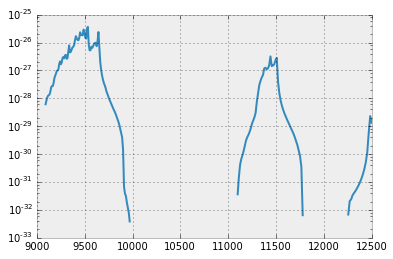

In [22]:
plt.semilogy(nu, coeff_co2)

I changed x-axis to use `nu` instead of wavenumbers, just to see that the results are consistent. The nice thing is when using `OmegaGrid` as a parameter, the `nu` array really contains only the numbers that were provided in the first place.